## Week 9 Challenge

### Importing necessary libraries

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt

**Q1** - *Create a data frame called DataFrame1. It should contain data about five employees. Each employee data consists of employee number, name, salary, department number and designation.*

In [2]:
#Creating data to form a DataFrame -- List of lists
data = [[100, 'Shardul', 60000, 1000, 'Senior Engineer'],
        [101, 'Sagarika', 80000, 1000, 'Senior Engineer'],
        [102, 'Smarina', 75000, 1001, 'Consultant'],
        [103, 'Karim', 85000, 1001, 'Supply chain Manager'],
        [104, 'Roshnee', 70000, 1001, 'Finance Manager']]

#Creating a pandas dataframe from dict -- Adding apt. columns names done in next question
DataFrame1 = pd.DataFrame(data)
DataFrame1

,0,1,2,3,4
0,100,Shardul,60000,1000,Senior Engineer
1,101,Sagarika,80000,1000,Senior Engineer
2,102,Smarina,75000,1001,Consultant
3,103,Karim,85000,1001,Supply chain Manager
4,104,Roshnee,70000,1001,Finance Manager


**Q2** - *In the DataFrame1 defined in Q.No. 1, add appropriate column names to the columns. Find the mean of the salary in the DataFrame1.*

In [3]:
#Adding apt column names to DataFrame1
DataFrame1.columns = ['Emp_num', 'Name', 'Salary (in $)', 'Dept_num', 'Designation']

print('The mean of salary in the dataframe: $ {:.2f}'.format(DataFrame1['Salary (in $)'].mean()))

#Showing the final dataframe1 with new columns
DataFrame1

The mean of salary in the dataframe: $ 74000.00


,Emp_num,Name,Salary (in $),Dept_num,Designation
0,100,Shardul,60000,1000,Senior Engineer
1,101,Sagarika,80000,1000,Senior Engineer
2,102,Smarina,75000,1001,Consultant
3,103,Karim,85000,1001,Supply chain Manager
4,104,Roshnee,70000,1001,Finance Manager


**Q3** - *Create a dictionary called dept. In this dictionary, the columns are deptno, deptname and location. Create a data frame called DataFrame2 from the dictionary dept.*

In [4]:
#Creating a dictionary to later enter as data into DataFrame -- Adding dummy data to it

dept = {'deptno' : [100, 101, 102, 105],
        'deptname' : ['Finance', 'Business strategy', 'Manufacturing', 'Supply chain'],
        'location' : ['United States', 'Germany', 'India', 'China']}

#Creating a dataframe using dept dict
DataFrame2 = pd.DataFrame(dept)
DataFrame2

,deptno,deptname,location
0,100,Finance,United States
1,101,Business strategy,Germany
2,102,Manufacturing,India
3,105,Supply chain,China


**Q4** - *Consider a sales.csv file with the following data:*
- Dinesh,7800,6500,4590
- Mahesh,8900,,3790
- Ramesh,10800,2300,
- Suresh,5600,6790,2300
- Basha,7600,2300,2400

*The data represents salesman name and sales in three regions: region1, region2 and region3. Load sles.csv into a data frame called DataFrame3. Give appropriate column names to the columns in DataFrame3. Display the contents of DataFrame3.*

In [5]:
#Loading data from a csv file into a pandas DataFrame

DataFrame3 = pd.read_csv('sales.csv', sep = ',', header = None, 
                        names = ['Salesman_name', 'Sales_region1', 'Sales_region2', 'Sales_region3'])

#Displaying the Dataframe
DataFrame3

,Salesman_name,Sales_region1,Sales_region2,Sales_region3
0,Dinesh,7800,6500.0,4590.0
1,Mahesh,8900,NaN,3790.0
2,Ramesh,10800,2300.0,NaN
3,Suresh,5600,6790.0,2300.0
4,Basha,7600,2300.0,2400.0


**Q5** - *In this exercise, demonstrate different methods of handling missing data in data frames. For reference, consider the DataFrame3 created in Q.No. 4. In DataFrame3, do the following: fill missing values with zeroes, fill missing values with the mean of their respective column, drop the rows containing missing values, drop the columns containing missing values.*

In [6]:
#Demonstrating different methods of handling missing data in DataFrame3
print('\033[1m' + 'The Original dataframe:' + '\033[0m' + '\n')
print(DataFrame3)

#Filling missing values with zero
df3_filled0 = DataFrame3.fillna(0)

print('\n' + '\033[1m' + 'Imputation handled by filling 0:' + '\033[0m' + '\n')
print(df3_filled0)

#Filling missing values using mean of respective columns
df_fillmean = DataFrame3.copy()

df_fillmean['Sales_region2'].fillna(df_fillmean['Sales_region2'].mean(), inplace = True)
df_fillmean['Sales_region3'].fillna(df_fillmean['Sales_region3'].mean(), inplace = True)

print('\n' + '\033[1m' + 'Imputation handled by filling mean of respective columns:' + '\033[0m' + '\n')
print(df_fillmean)


#Dropping rows containing missing values
df_droprow = DataFrame3.copy()
df_droprow.dropna(axis = 0, inplace = True)

print('\n' + '\033[1m' + 'Dropping rows containing NaN values:' + '\033[0m' + '\n')
print(df_droprow)

#Dropping columns containing missing values
df_dropcol = DataFrame3.copy()
df_dropcol.dropna(axis = 1, inplace = True)

print('\n' + '\033[1m' + 'Dropping columns containing NaN values:' + '\033[0m' + '\n')
print(df_dropcol)

The Original dataframe:

  Salesman_name  Sales_region1  Sales_region2  Sales_region3
0        Dinesh           7800         6500.0         4590.0
1        Mahesh           8900            NaN         3790.0
2        Ramesh          10800         2300.0            NaN
3        Suresh           5600         6790.0         2300.0
4         Basha           7600         2300.0         2400.0

Imputation handled by filling 0:

  Salesman_name  Sales_region1  Sales_region2  Sales_region3
0        Dinesh           7800         6500.0         4590.0
1        Mahesh           8900            0.0         3790.0
2        Ramesh          10800         2300.0            0.0
3        Suresh           5600         6790.0         2300.0
4         Basha           7600         2300.0         2400.0

Imputation handled by filling mean of respective columns:

  Salesman_name  Sales_region1  Sales_region2  Sales_region3
0        Dinesh           7800         6500.0         4590.0
1        Mahesh           

**Q6** - *From DataFrame1 create a new data frame called DataFrame4. In DataFrame4, set the employee number as in-place index. Display data from 3rd row and 4th column using label-based, integer-based indexing and combination of label and integer indexing methods.*

In [7]:
#Creating a new DataFrame by setting the index of DF1 as Emp_num column
DataFrame4 = DataFrame1.set_index('Emp_num')

print('\033[1m' + 'The resulting dataframe by setting Emp_num as index:' + '\033[0m' + '\n')
print(DataFrame4)

#Displaying results of different indexing methods  
print('\n' + '\033[1m' + 'Indexing using .loc method:' + '\033[0m' + '\n')
print(DataFrame4.loc[102, 'Designation'])

print('\n' + '\033[1m' + 'Indexing using .iloc method:' + '\033[0m' + '\n')
print(DataFrame4.iloc[2, 3])

print('\n' + '\033[1m' + 'Indexing using .iloc method (As .ix is no longer supported):' + '\033[0m' + '\n')
print('Current Python version: \n{}\n'.format(sys.version))

#Using .iloc method as hybrid approach as .ix is no longer supported in Python v3.8 
print(DataFrame4.iloc[2, 3])

The resulting dataframe by setting Emp_num as index:

             Name  Salary (in $)  Dept_num           Designation
Emp_num                                                         
100       Shardul          60000      1000       Senior Engineer
101      Sagarika          80000      1000       Senior Engineer
102       Smarina          75000      1001            Consultant
103         Karim          85000      1001  Supply chain Manager
104       Roshnee          70000      1001       Finance Manager

Indexing using .loc method:

Consultant

Indexing using .iloc method:

Consultant

Indexing using .iloc method (As .ix is no longer supported):

Current Python version: 
3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]

Consultant


**Q7** - *In DataFrame3 created in Q.No. 5, find the salesmen whose sales are greater than 7000 in region1 but less than 3000 in region2*

In [8]:
#Assuming using the original DataFrame3 used in Q5 as the other methods all were implemented on a copy dataframe

print('\033[1m' + 'The Original dataframe:' + '\033[0m' + '\n')
print(DataFrame3)

#Finding the salesman whose Sales_region1 > 7000 and Sales_region2 < 3000 
bool_mask = (DataFrame3['Sales_region1'] > 7000) & (DataFrame3['Sales_region2'] < 3000)

#Filtering from the original DataFrame3 and printing the result
result = '\n'.join(DataFrame3[bool_mask]['Salesman_name'].values)
print('\n' + '\033[1m' + 'The salesman who satisfy the boolean mask condition:' + '\033[0m' + '\n{}'.format(result))

The Original dataframe:

  Salesman_name  Sales_region1  Sales_region2  Sales_region3
0        Dinesh           7800         6500.0         4590.0
1        Mahesh           8900            NaN         3790.0
2        Ramesh          10800         2300.0            NaN
3        Suresh           5600         6790.0         2300.0
4         Basha           7600         2300.0         2400.0

The salesman who satisfy the boolean mask condition:
Ramesh
Basha


**Q8** - *In DataFrame1 created in Q. No. 1, find the employees with the highest salary in each department. Use the group by clause and the max() function. Similarly, in DataFrame3 created in Q. No. 5, find the salesman with the highest amount of sales for each region.*

In [9]:
#Using the DataFrame1 with column names added already
print('\033[1m' + 'The Original DataDrame1:' + '\033[0m' + '\n')
print(DataFrame1)

#Finding employees with the highest salary in each department
print('\n' + '\033[1m' + 'The employees with highest salary in each dept:' + '\033[0m' + '\n')

#Creating a Dataframegroupby object
group_obj1 = DataFrame1.groupby('Dept_num')

#Storing final results with dept and name of highest earners in dict
result1 = {}

#Iterating over the df groupby object -- Also able to handle multiple employees with highest salary
for dept, df in group_obj1:
    
    #Obtaining the highest salary from the filtered dataframe
    max_salary = df['Salary (in $)'].max()
    
    #Obtaining the employees with highest salary using bool masking
    out = df[df['Salary (in $)'] == max_salary]['Name'].values.tolist()
    
    #Storing the results in the dictionary
    result1[dept] = out
    
#Iterating over the dict
for dept, emp in result1.items():
    print('The highest salary in dept {}: {}'.format(dept, emp))
    
print('\n' + '*' * 15 + '\n')

#Using DataFrame3 and finding the salesman with highest sales in each region

print('\033[1m' + 'The Original DataDrame3:' + '\033[0m' + '\n')
print(DataFrame3)

print('\n' + '\033[1m' + 'The salesman with highest sales in each region:' + '\033[0m' + '\n')

#Creating a list to directly iterate over and obtain results from the original DataFrame3
region = ['region1', 'region2', 'region3']

#Iterating over the above list and using filteration and indexing to obtain the salesman with highest sales in each
for reg in region:
    
    #Obtaining the name of the salesman in the form of a list
    out = DataFrame3[DataFrame3['Sales_'+reg] == DataFrame3['Sales_'+reg].max()]['Salesman_name'].values.tolist()
    print('The salesman with highest sales in {}: {}'.format(reg, out))

The Original DataDrame1:

   Emp_num      Name  Salary (in $)  Dept_num           Designation
0      100   Shardul          60000      1000       Senior Engineer
1      101  Sagarika          80000      1000       Senior Engineer
2      102   Smarina          75000      1001            Consultant
3      103     Karim          85000      1001  Supply chain Manager
4      104   Roshnee          70000      1001       Finance Manager

The employees with highest salary in each dept:

The highest salary in dept 1000: ['Sagarika']
The highest salary in dept 1001: ['Karim']

***************

The Original DataDrame3:

  Salesman_name  Sales_region1  Sales_region2  Sales_region3
0        Dinesh           7800         6500.0         4590.0
1        Mahesh           8900            NaN         3790.0
2        Ramesh          10800         2300.0            NaN
3        Suresh           5600         6790.0         2300.0
4         Basha           7600         2300.0         2400.0

The salesman wit

**Q9** - *In DataFrame1 created in Q. No. 1, add a new column called Address. In this new column, set the value as ‘Chennai’ for all the existing rows*

In [10]:
#Adding a new column 'Address' in DataFrame1

print('\033[1m' + 'The Original DataDrame1:' + '\033[0m' + '\n')
print(DataFrame1)

print('\n' + '\033[1m' + 'Modified DataFrame1:' + '\033[0m' + '\n')

#Adding the column Address
DataFrame1['Address'] = 'Chennai'
DataFrame1

The Original DataDrame1:

   Emp_num      Name  Salary (in $)  Dept_num           Designation
0      100   Shardul          60000      1000       Senior Engineer
1      101  Sagarika          80000      1000       Senior Engineer
2      102   Smarina          75000      1001            Consultant
3      103     Karim          85000      1001  Supply chain Manager
4      104   Roshnee          70000      1001       Finance Manager

Modified DataFrame1:



,Emp_num,Name,Salary (in $),Dept_num,Designation,Address
0,100,Shardul,60000,1000,Senior Engineer,Chennai
1,101,Sagarika,80000,1000,Senior Engineer,Chennai
2,102,Smarina,75000,1001,Consultant,Chennai
3,103,Karim,85000,1001,Supply chain Manager,Chennai
4,104,Roshnee,70000,1001,Finance Manager,Chennai


**Q10** - *Create a line graph and bar chart to visualize the two data frames, DataFrame1 and DataFrame3.*

### Visalising DataFrame1 & DataFrame3

*Objectives:*

- Plotting a line graph between Employee name vs salary 
- Creating a bar graph depicting mean sales in each region
- Creating a bar graph comparing salesman performance across regions (Inc. employees with no missing data)

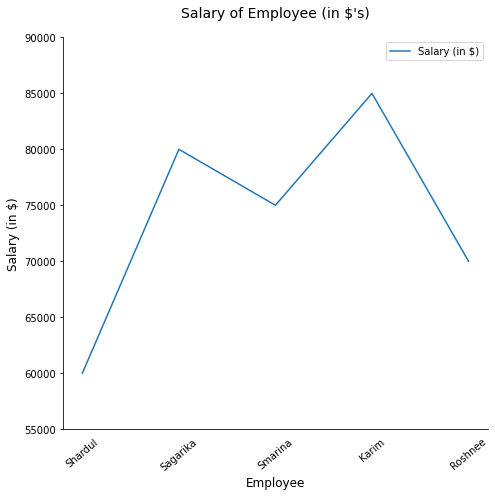

In [13]:
#Maximising the dark ink ratio of the pandas plot
ax = plt.subplot(111)

#Creating a line graph
DataFrame1.plot(x = 'Name', y = 'Salary (in $)', kind='line', figsize=(7,7), rot = 40, ax = ax)

#Setting parameters of the figure
ax.set_title("Salary of Employee (in $'s)", fontsize = 14, pad = 20)
ax.set_xlabel('Employee', fontsize = 12)
ax.set_ylabel('Salary (in $)', fontsize = 12)

#Cleaning up the ticks and frames of the figure -- Setting y range limits
plt.tick_params(left = True, bottom = False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Setting y axis range limit and showing the plot
ax.set_ylim([55000, 90000])
plt.tight_layout()
plt.show()

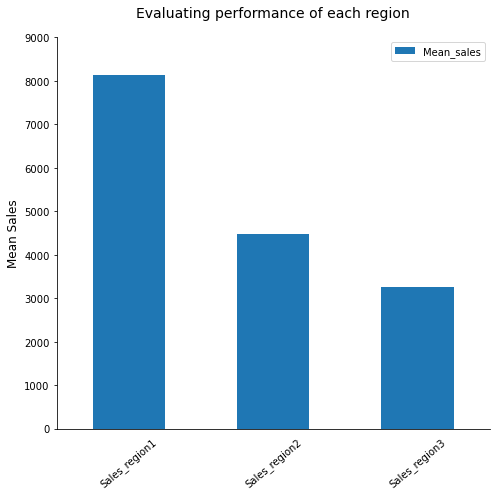

In [14]:
#Maximising the dark ink ratio of the pandas plot
ax = plt.subplot(111)

#Creating a new mean_DataFrame3 containg mean_sales in each region -- Evaluating performance
mean_DataFrame3 = pd.DataFrame(DataFrame3.mean(), columns = ['Mean_sales'])

#Plotting the DataFrame as a bar graph
mean_DataFrame3.plot(kind='bar', figsize=(7,7), rot = 40, ax = ax)

#Setting parameters of the figure
ax.set_title("Evaluating performance of each region", fontsize=14, pad = 20)
ax.set_ylabel('Mean Sales', fontsize = 12)

#Cleaning up the ticks and frames of the figure
plt.tick_params(left = True, bottom = False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Setting y axis range limit and showing the plot
ax.set_ylim([0, 9000])
plt.tight_layout()
plt.show()

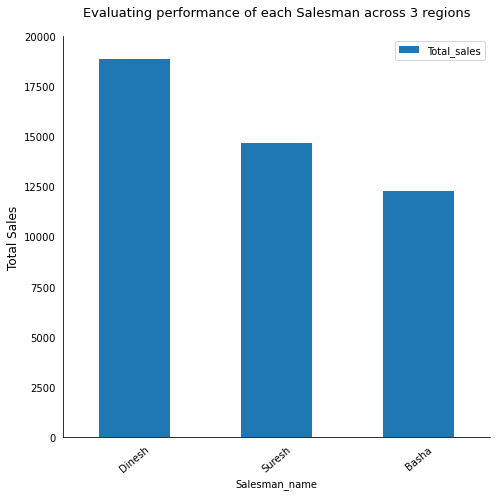

In [18]:
#Maximising the dark ink ratio of the pandas plot
ax = plt.subplot(111)

#Creating a new Dataframe to evaluate the performance of each salesman -- Having no missing data
df3 = DataFrame3.copy()

#Applying a lambda function to calculate the total sales
df3['Total_sales'] = df3.apply(lambda x: x['Sales_region1'] + x['Sales_region2'] + x['Sales_region3'], axis=1)
df3.dropna(axis=0, inplace = True)

#Plotting the data containing total sales across all 3 regions for salesman
df3.plot(x = 'Salesman_name', y = 'Total_sales', kind='bar', figsize = (7,7), rot = 40, ax = ax)

#Setting parameters of the figure
ax.set_title("Evaluating performance of each Salesman across 3 regions", fontsize=13, pad = 20)
ax.set_ylabel('Total Sales', fontsize = 12)

#Cleaning up the ticks and frames of the figure
plt.tick_params(left = False, bottom = False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Setting y axis range limit and showing the plot
ax.set_ylim([0, 20000])
plt.tight_layout()
plt.show()

TypeError: 'str' object does not support item assignment